In [1]:
import os
import pathlib

if pathlib.Path(os.curdir).resolve().name != "DeepAWB":
    os.chdir("..")

In [4]:
import importlib

import src.deep_awb.data_loaders as data_loaders

importlib.reload(data_loaders)

image_scale = 1
data_loaders.SimpleCubePPDatasetInfo.setup(image_scale)

dataset = data_loaders.get_test_dataset()

In [5]:
import torch

import src.deep_awb.model_inference as model_inference

model = model_inference.load_model(pathlib.Path("./traced_model.pt"))


model = model_inference.optimize_model(model, torch.randn(1, 3, *data_loaders.SimpleCubePPDatasetInfo.image_dims))

2024-09-14 16:29:49.955 | INFO     | src.deep_awb.model_inference:load_model:81 - Current device: cpu


In [35]:
from torchvision.transforms.functional import to_pil_image

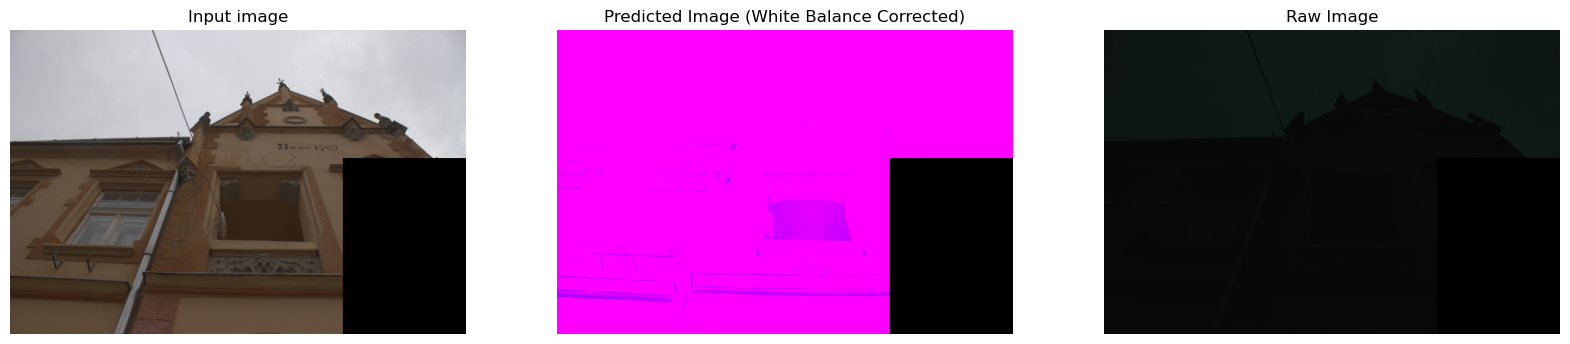

In [44]:
import random

import matplotlib.pyplot as plt
from PIL import Image

from src import DATASET_DIR
from src.visualization.image_visualization import image_processing_pipeline

N_images = len(dataset)

i = random.randint(0, N_images - 1)

processable_image, label = dataset[i]
wb_gains = model(processable_image.unsqueeze(0))

image_name = dataset.annotations["image"][i] + ".png"
input_image = to_pil_image(processable_image)

raw_image_path = DATASET_DIR / "test" / "PNG" / image_name
raw_image = Image.open(raw_image_path)

predicted_image = image_processing_pipeline(raw_image_path, None, wb_gains.numpy()[0])
predicted_image = Image.fromarray(predicted_image)


images_to_display = [("Input image", input_image), ("Predicted Image (White Balance Corrected)", predicted_image), ("Raw Image", raw_image)]

fig, ax = plt.subplots(1, len(images_to_display), figsize=(20, 8))
for i in range(len(images_to_display)):
    ax[i].imshow(images_to_display[i][1])
    ax[i].set_title(images_to_display[i][0])
    ax[i].axis("off")

plt.show()
